## 컨볼루션 신경망(CNN)

컨볼루션 신경망
- 합성곱신경망
- 주로 시각적 이미지를 분석하는 데 사용
- 영상에서 객체, 얼굴, 장면등의 패턴을 찾을 때 유용
- 오디오, 시계열, 신호 데이터 등 영상 이외의 데이터 분류에도 효과적

- 입력된 이미지에서 다시 한번 특징을 추출하기 위해 
    - 마스크(필터, 윈도 또는 커널이라고도 함)를 도입하는 기법

### 기본 개념  

- 컨볼루션(합성곱)  
- 풀링(Pooling)   
- 드롭아웃(drop out)  

### 컨볼루션(합성곱) 층

#### 컨볼루션(합성곱) 층 
- 입력된 이미지에
- 커널(마스크, 필터)을 적용하여
- 새로 계산된 가중치 값을 갖는 새로운 층 생성
- 컨볼루션을 만들면 입력 데이터로부터 더 정교한 특징 추출 가능
- 여러 개의 커널을 적용할 경우 여러 개의 컨볼루션 생성


적용된 부분은 원래 있던 값에 가중치의 값을 곱해 줌    
(1 x 1) + (0 x 0) + (0 x 0) + (1 x 1) = 2 

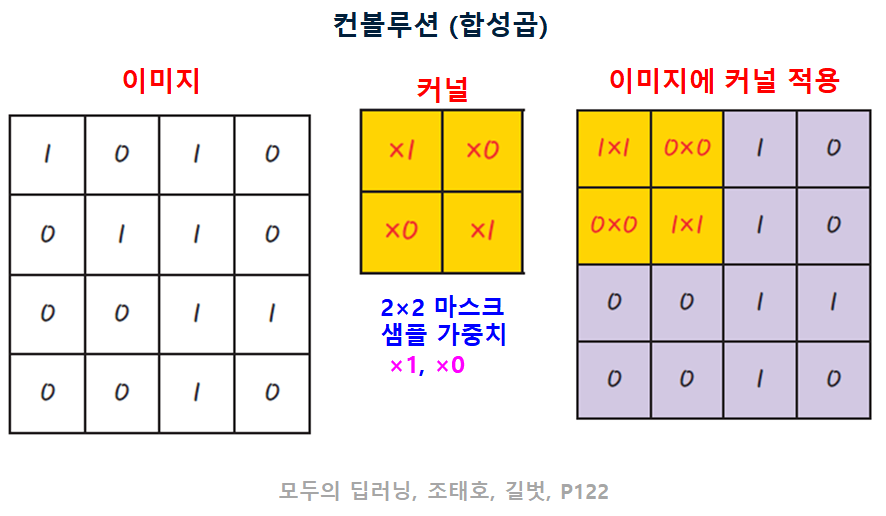

이 마스크를 한 칸씩 옮겨 적용 --> 새롭게 만들어진 층을 컨볼루션(합성곱) 이라고 함 

**스트라이드(stride)**
- 필터를 적용하는 위치의 간격
- 보폭
- 아래 그림은 스트라이드가 1인 경우

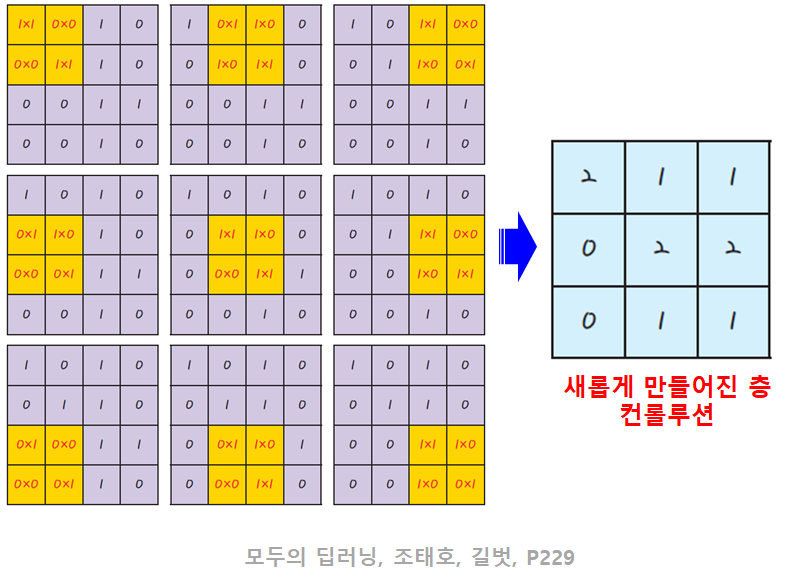

이러한 커널을 여러 개 만들 경우 여러 개의 컨볼루션이 만들어짐

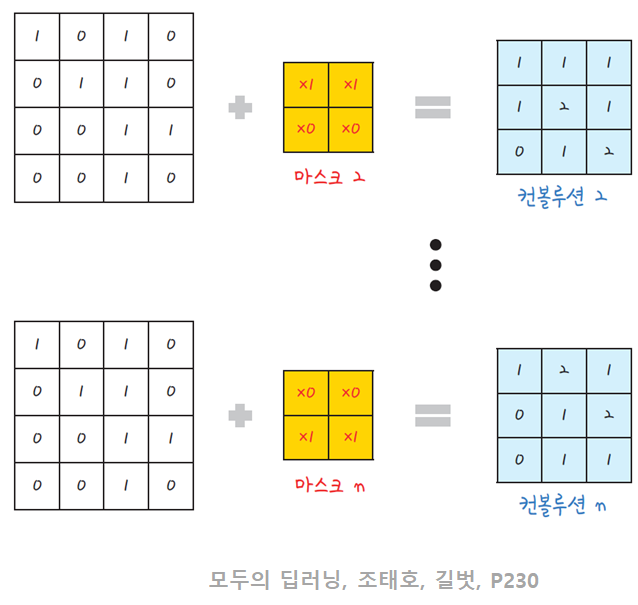

**케라스에서 컨볼루션 층을 추가하는 함수 : Conv2D()**  
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))

Conv2D() 함수 인자  
- 커널 수
- 커널 크기 : kernel_size=(3, 3) (3x3 크기)
- 입력값 : input_shape=(28, 28, 1) (행, 열, 색상 또는 흑백) (컬러:3, 흑백:1)
- 활성화 함수 : activation='relu'

풀링(Pooling) 또는 서브 샘플링(Sub Sampling)
- 컨볼루션 층을 통해 도출한 결과가 크고 복잡한 경우 축소하는 과정
- 맥스 풀링 (Max Pooling) : 정해진 구역 안에서 최대값 추출
- 평균 풀링 (average pooling) : 평균값 추출

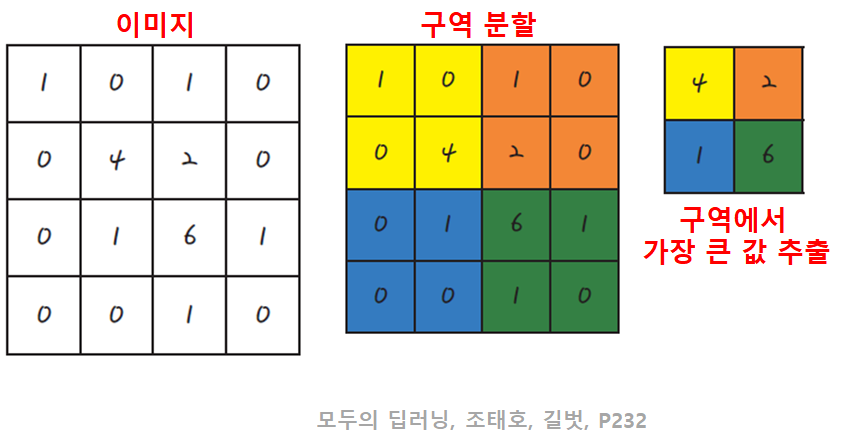

### **이 과정을 거쳐 불필요한 정보를 간추림**

**맥스 풀링**
- CNN은 주로 Maxpooling을 사용
- MaxPooling2D() 함수 사용
- model.add(MaxPooling2D(pool_size=2))

- 여기서 pool_size는 풀링 창의 크기를 정하는 것으로,   
    - 수직, 수평 축소 비율을 지정
    - 2로 정하면 전체 크기가 절반으로 줄어듦
    - pool_size : 수직, 수평 축소 비율을 지정
    
- (2, 2)이면 출력 영상 크기는 입력 영상 크기의 반으로 줄어들게 되고
    - 가장 큰값만 추출   
    
 

**드롭아웃, 플래튼 : 딥러닝 학습을 실행할 때 가장 중요한 것**
- 과적합을 피할 수 있는 효과적이 방법 

**드롭아웃(drop out)**   
- 드롭아웃은 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것
- 간단하지만 효과가 큰 기법
- 랜덤하게 노드를 끔으로써 학습 데이터에 지나치게 치우쳐서 학습되는 과적합을 방지할 수 있음
- model.add(Dropout(0.25)) : 25%의 노드를 끔 
    
**플래튼 (Flatten)**
- 2차원 배열을 1차원으로 바꿔줌
- model.add(Flatten())
- **컨볼루션 층이나 맥스 풀링층은 주어진 이미지를 2차원 배열 형태**로 다룸
- 이제 이러한 과정을 지나 
- 다시 앞에서 **Dense( ) 함수를 이용해 만들었던 기본 층에 연결**할 때 
    - 주의할 점은 이를 1차원 배열로 바꿔주어야 함 
- Flatten( ) 함수를 사용해 2차원 배열을 1차원으로 바꿔줌
- model.add(Flatten())

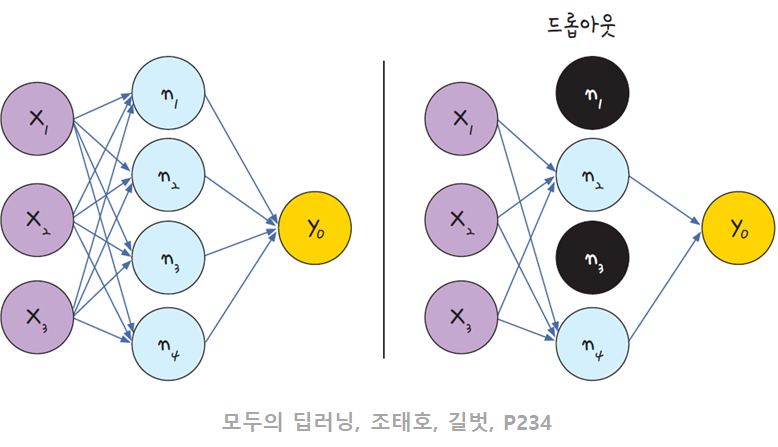

#### 그림 : 드롭아웃과 플래튼이 추가된 신경망

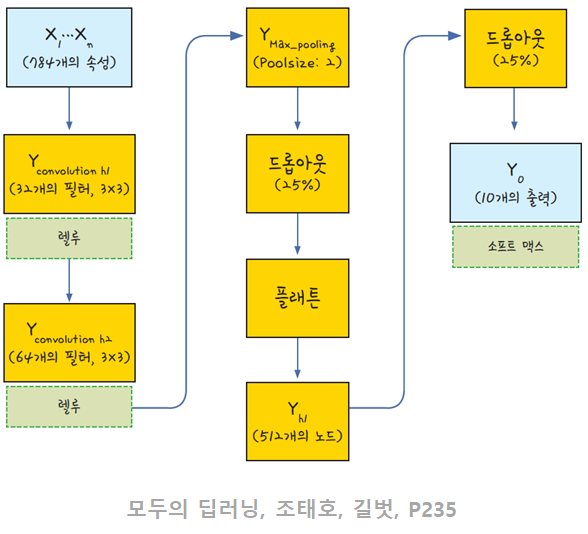

### 간단한 convenets 예제

- 딥러닝3_손글씨 숫자 분류 예제를 convents을 사용
    - 완전 연결네트워크 사용시 정확도가 97.8%였음 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
# 데이터 로드 
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

In [5]:
# 차원 변환 및 정규화

# (이미지수,가로, 세로, 채널) : 1(흑백), 3(컬러)
# X_train : (60000, 28, 28) -> (60000, 28*28) == (60000, 784)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

from  keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(60000, 28, 28, 1)

(60000, 10)

(10000, 28, 28, 1)

(10000, 10)

In [7]:
import tensorflow as tf
tf.random.set_seed(3)

In [8]:
# 케라스에서 컨볼루션 층을 추가하는 함수 : Conv2D()
# model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))

# Conv2D() 함수 인자

# 커널 수
# 커널 크기 : kernel_size=(3, 3) (3x3 크기)
# 입력값 : input_shape=(28, 28, 1) (행, 열, 색상 또는 흑백) (컬러:3, 흑백:1)
# input_shape(a,b,c) 에서 마지막 채널수 인 c가 입력수가 됨
# 활성화 함수 : activation='relu'

In [9]:
# convolution 신경망 설정
# (1) 모델 설정

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Flatten, Conv2D, MaxPooling2D



model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu')) # 입력수 : 1 : 흑백
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 첫번째 층
# 필터크기(3X3) X 입력채널(1) X 출력채널(32) + 출력채널(32)
# (3X3) X 1 X 32 + 32 = 320

# 두번째 층
# 필터크기(3X3) X 입력채널(32) X 출력채널(64) + 출력채널(64)
# (3X3) X 32 X 64 + 64 = 18496 

# 세번째 층
# 입력 : flatten_1의 출력층 = Dense(세번째 층)층의 입력수 : 1600
# 출력 : 128
# 필터 없음
# 1600 X 128 + 128 = 204928

# 네번째 층
# 입력 : 128
# 출력 : 10
# 128 X 10 + 10 = 1290

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [11]:
# (2)컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='adam', 
             metrics=['accuracy'])

In [12]:
# CheckPoint와 EarlyStopping 적용

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# 파일 저장할 폴더 지정 : 없으면 새로 생성 
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# model 안에 파일로 저장
model_path = './model/{epoch:02d}-{val_loss: .4f}.keras'

# EarlyStopping : 모델 최적화 단계에서 학습 자동 중단 설정
check_pointer = ModelCheckpoint(filepath=model_path,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [14]:
# (3)모델 학습 (실행)
history = model.fit(X_train, y_train, 
                   epochs=30, batch_size=200,
                   validation_data=(X_test, y_test), 
                   callbacks=[check_pointer, early_stopping])

Epoch 1/30
300/300 [==============================] - ETA: 0s - loss: 0.3565 - accuracy: 0.8901
Epoch 1: val_loss improved from inf to 0.07561, saving model to ./model/01- 0.0756.keras
300/300 [==============================] - 23s 75ms/step - loss: 0.3565 - accuracy: 0.8901 - val_loss: 0.0756 - val_accuracy: 0.9759
Epoch 2/30
300/300 [==============================] - ETA: 0s - loss: 0.1098 - accuracy: 0.9677
Epoch 2: val_loss improved from 0.07561 to 0.04637, saving model to ./model/02- 0.0464.keras
300/300 [==============================] - 19s 65ms/step - loss: 0.1098 - accuracy: 0.9677 - val_loss: 0.0464 - val_accuracy: 0.9844
Epoch 3/30
300/300 [==============================] - ETA: 0s - loss: 0.0806 - accuracy: 0.9762
Epoch 3: val_loss improved from 0.04637 to 0.03610, saving model to ./model/03- 0.0361.keras
300/300 [==============================] - 22s 75ms/step - loss: 0.0806 - accuracy: 0.9762 - val_loss: 0.0361 - val_accuracy: 0.9881
Epoch 4/30
300/300 [==================

300/300 [==============================] - 15s 51ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0199 - val_accuracy: 0.9946
Epoch 29/30
300/300 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9950
Epoch 29: val_loss did not improve from 0.01802
300/300 [==============================] - 18s 61ms/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.0205 - val_accuracy: 0.9935
Epoch 30/30
300/300 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9948
Epoch 30: val_loss did not improve from 0.01802
300/300 [==============================] - 18s 61ms/step - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.0195 - val_accuracy: 0.9943


In [15]:
# 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

<Figure size 1800x600 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

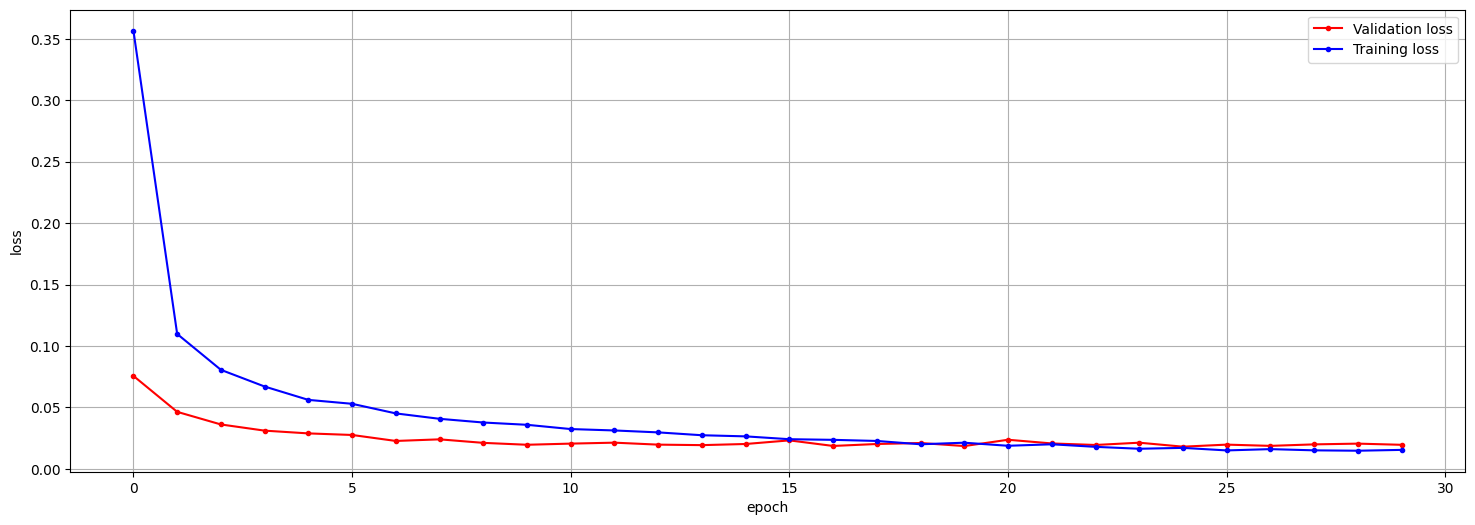

In [18]:
import numpy

plt.figure(figsize=(18, 6))

# 손실률
x_len = numpy.arange(len(loss))
plt.plot(x_len, val_loss, marker='.', c='red', label='Validation loss')
plt.plot(x_len, loss, marker='.', c='blue', label='Training loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

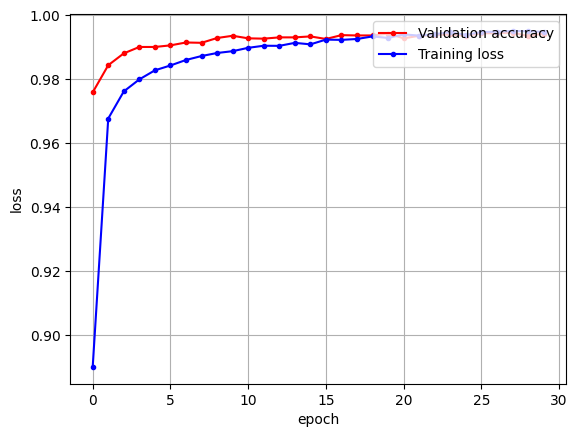

In [20]:
# 정확도
x_len = numpy.arange(len(loss))
plt.plot(x_len, val_acc, marker='.', c='red', label='Validation accuracy')
plt.plot(x_len, acc, marker='.', c='blue', label='Training loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()